In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
train=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\MachineLearning\titanic\train.csv')
test=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\MachineLearning\titanic\test.csv')

In [11]:
titanic_data=pd.concat([train,test],ignore_index=True)

In [12]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
nan_columns=titanic_data.columns[titanic_data.isna().any()]
nan_columns

Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [14]:
from sklearn.impute import SimpleImputer
mode_imputer=SimpleImputer(strategy='most_frequent')
mean_imputer=SimpleImputer(strategy='mean')

In [15]:
for nan_column in nan_columns:
    if titanic_data[nan_column].dtype=='object':
        titanic_data[nan_column]=mode_imputer.fit_transform(titanic_data[[nan_column]])
    elif titanic_data[nan_column].dtype=='float' or titanic_data[nan_column].dtype=='int':
        titanic_data[nan_column]=mean_imputer.fit_transform(titanic_data[[nan_column]])

### columns with Object data type

In [16]:
categorical_columns=titanic_data.select_dtypes(['object']).columns
to_drop_columns=[]
for categorical_column in categorical_columns:
    print(categorical_column,' : ',titanic_data[categorical_column].nunique())
    if titanic_data[categorical_column].nunique()>20:
        to_drop_columns.append(categorical_column)

Name  :  1307
Sex  :  2
Ticket  :  929
Cabin  :  186
Embarked  :  3


In [17]:
titanic_data=titanic_data.drop(columns=to_drop_columns)
titanic_data=titanic_data.drop('PassengerId',axis=1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [19]:
categorical_columns=titanic_data.select_dtypes(['object']).columns
for categorical_column in categorical_columns:
    matrix=ohe.fit_transform(titanic_data[[categorical_column]]).toarray()
    matrix_df=pd.DataFrame(matrix,columns=ohe.categories_)
    titanic_data=pd.concat([titanic_data,matrix_df],axis=1)
    
titanic_data=titanic_data.drop(columns=categorical_columns)

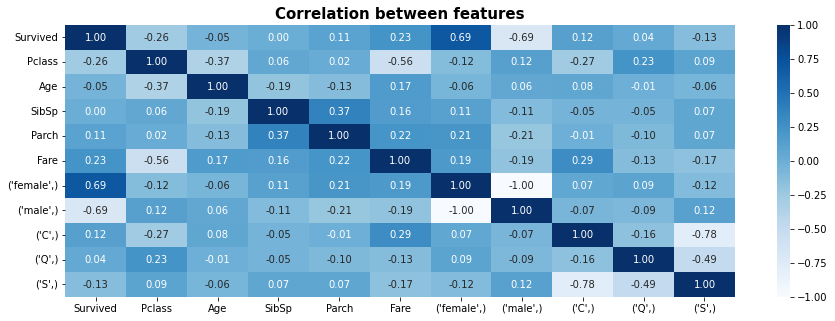

Survived     1.000000
(female,)    0.688371
Fare         0.233568
(C,)         0.121156
Parch        0.108919
(Q,)         0.040950
SibSp        0.002370
Age         -0.048483
(S,)        -0.133020
Pclass      -0.264710
(male,)     -0.688371
Name: Survived, dtype: float64


In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(titanic_data.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.title('Correlation between features',size=15,fontweight='bold')
plt.show()

print(titanic_data.corr()['Survived'].sort_values(ascending=False))

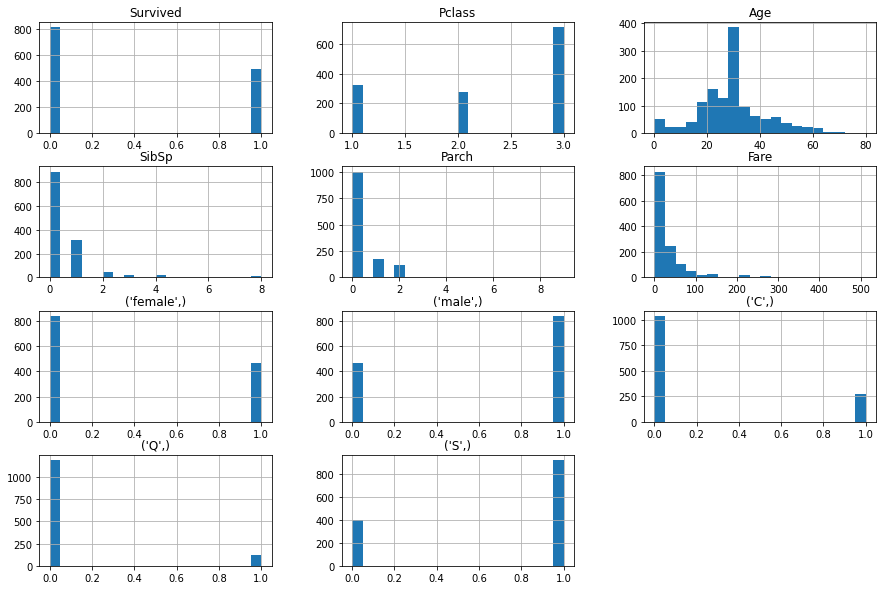

In [21]:
titanic_data.hist(bins=20,figsize=(15,10))
plt.show()

### define the model 

In [22]:
X=titanic_data.drop(columns='Survived')
Y=titanic_data['Survived']

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [24]:
lr_model=LogisticRegression()

In [25]:
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [26]:
# train

xtrain_predictions=lr_model.predict(xtrain)
train_accuracy_score=accuracy_score(xtrain_predictions,ytrain)
print('Accuracy score for train data : ',train_accuracy_score)

Accuracy score for train data :  0.8510028653295129


In [27]:
# test

xtest_predictions=lr_model.predict(xtest)
test_accuracy_score=accuracy_score(xtest_predictions,ytest)
print('Accuracy score for test data : ',test_accuracy_score)

Accuracy score for test data :  0.8854961832061069
